In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replace the blank value from 0 in no.of tenure empty

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")

In [7]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df["customerID"].duplicated().sum()

0

#Converted 0 and 1 values of SeniorCitizen to yes/no for better understanding 

In [24]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [26]:
df.head()
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,no,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,no,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,no,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,no,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


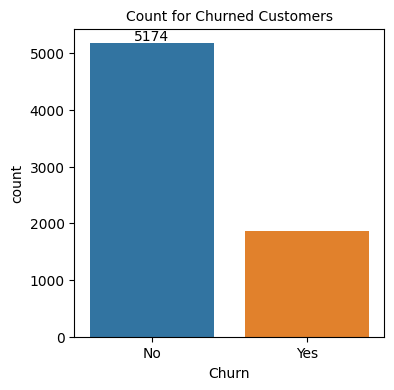

In [54]:
plt.figure(figsize = [4,4])
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count for Churned Customers", fontsize = 10)
plt.show()

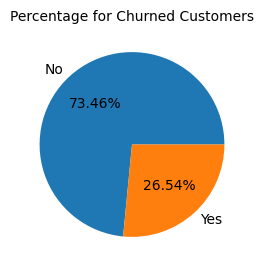

In [45]:
plt.figure(figsize = [3,3])
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage for Churned Customers", fontsize = 10)
plt.show()

#from the given pie chart we conclude that 26.54% customers have churned

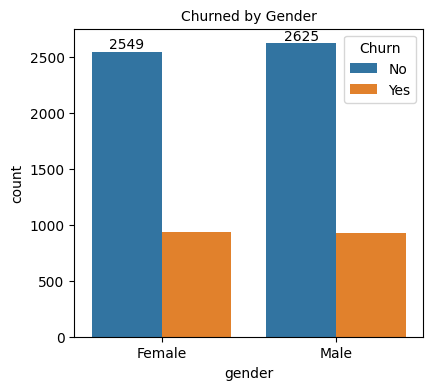

In [58]:
plt.figure(figsize = [4.5,4])
ax = sns.countplot(x = 'gender' , data = df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned by Gender", fontsize = 10)
plt.show()

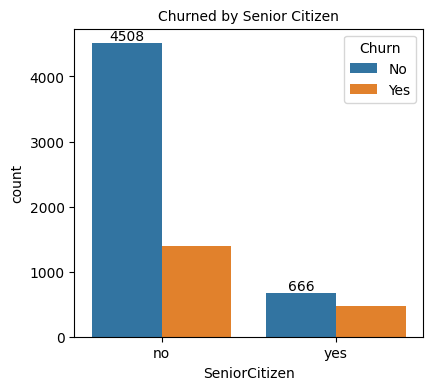

In [60]:
plt.figure(figsize = [4.5,4])
ax = sns.countplot(x = 'SeniorCitizen' , data = df, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Churned by Senior Citizen", fontsize = 10)
plt.show()

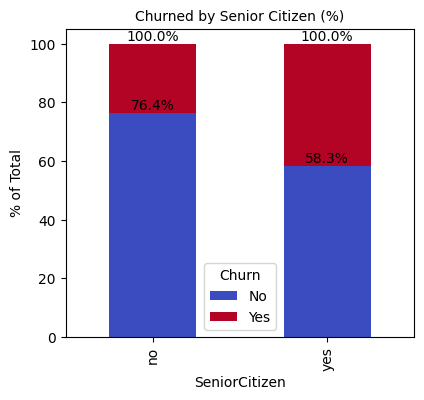

In [61]:
# Calculate the percentages for each 'SeniorCitizen' and 'Churn' combination
grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percentages = grouped.divide(grouped.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(4.5, 4), cmap='coolwarm')

# Add labels to each bar (percentage labels)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.title("Churned by Senior Citizen (%)", fontsize=10)
plt.ylabel('% of Total')
plt.show()

#Comparative a grater percentage of senior citizen category have churned 

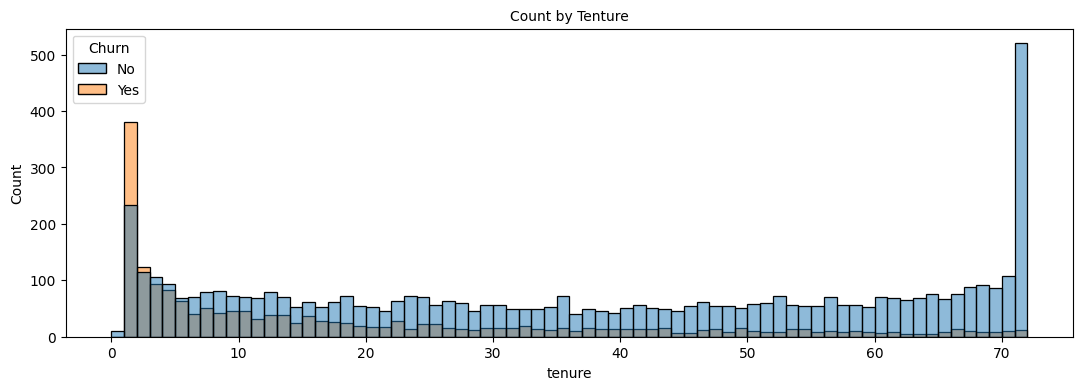

In [68]:
plt.figure(figsize = [13,4])
sns.histplot(x = 'tenure', data=df, bins = 72, hue = 'Churn')
plt.title('Count by Tenture', fontsize = 10)
plt.show()

#people who have used our services  for a long time have stayed and people who have used our services # 1 month they have churned

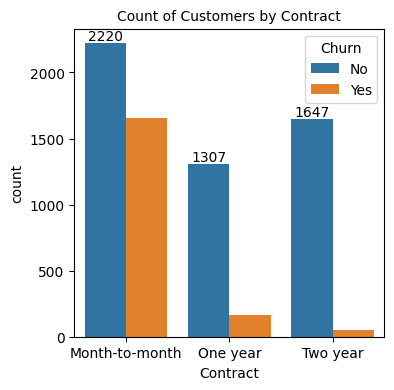

In [77]:
plt.figure(figsize = [4,4])
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract', fontsize = 10)
plt.show()

#people who have month to month plan they have churn and people have 1 or 2 year plan they stay

In [79]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

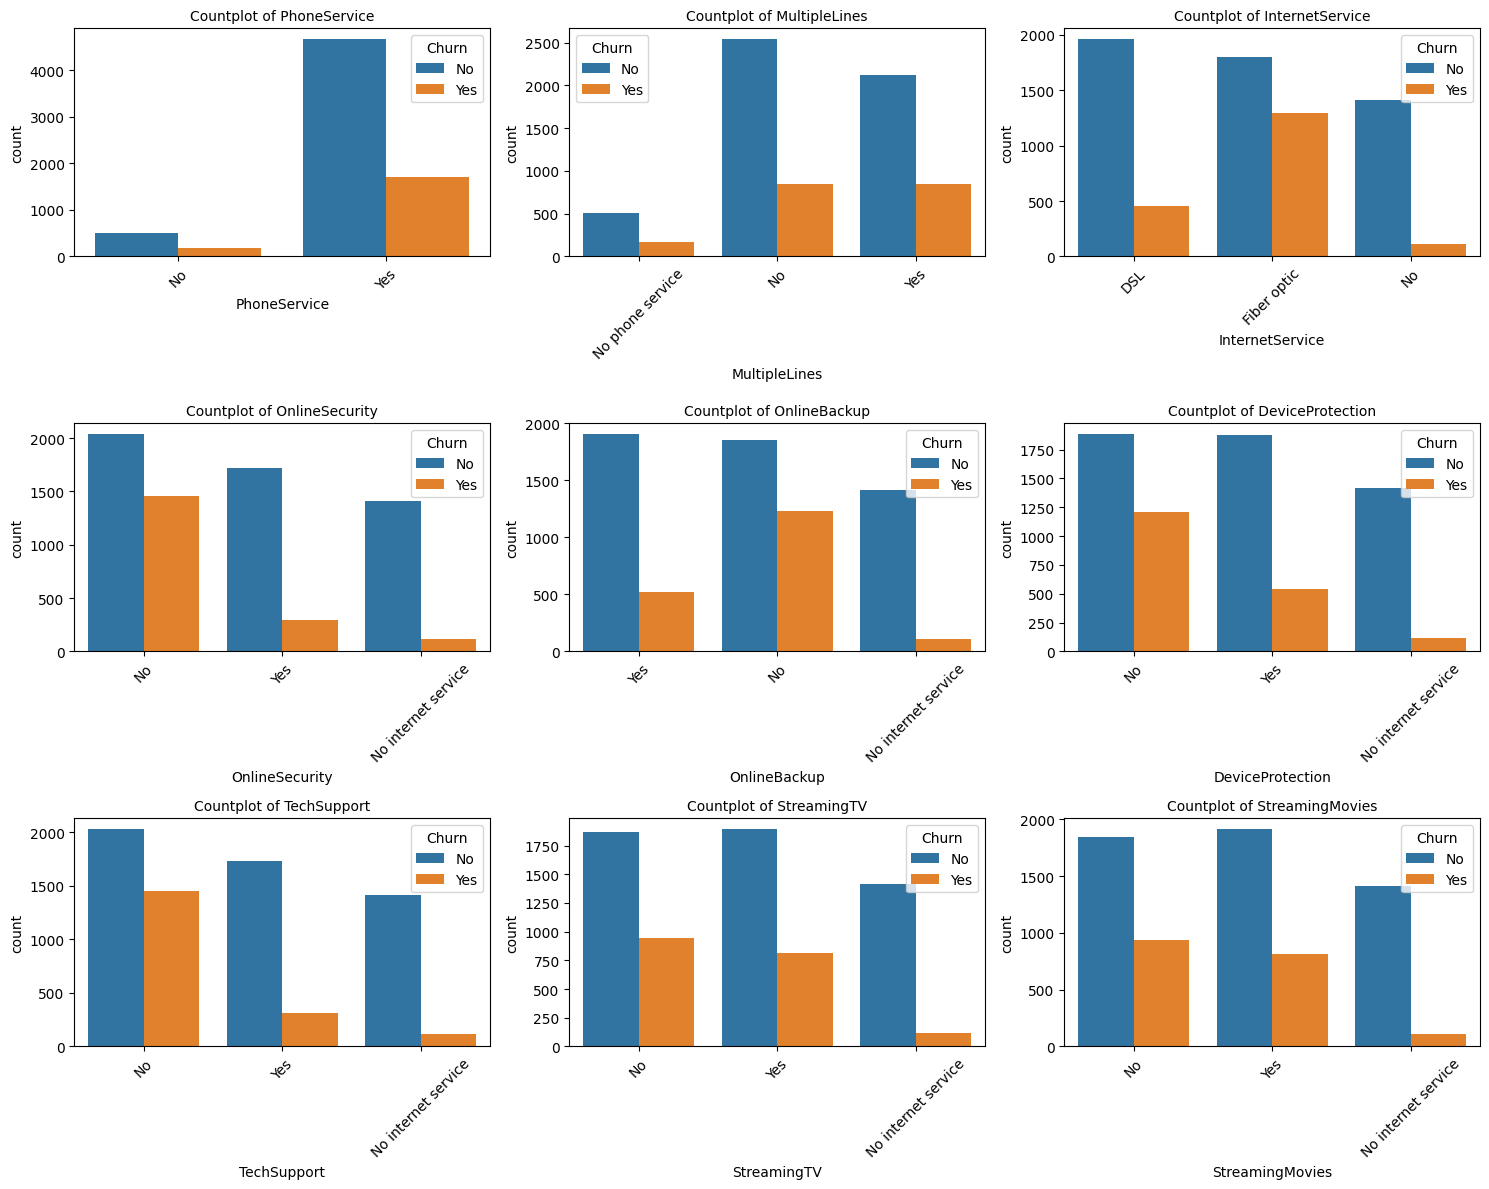

In [82]:
# Define the columns for which you want to create countplots
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a countplot in the respective subplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = 'Churn')
    axes[i].set_title(f"Countplot of {col}", fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


#The data visualized in these subplots show the distribution of customer churn based on various services like PhoneService, MultipleLines, InternetService, and others. In each plot, the blue bars represent customers who did not churn, and the orange bars represent those who churned.Generally, across most services, customers who have opted for these services (Yes) tend to churn less compared to those who haven't (No or No internet service). This trend is noticeable, for instance, in OnlineSecurity, TechSupport, and DeviceProtection, where customers without these services churn at a higher rate.

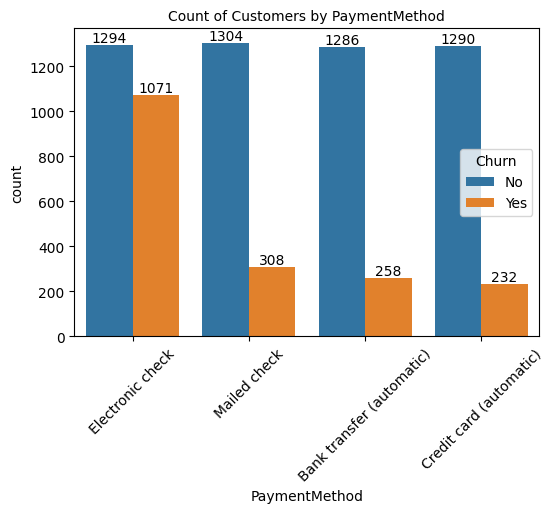

In [87]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)
plt.title('Count of Customers by PaymentMethod', fontsize = 10)
plt.show()

#customer likely to churn when they use electronic check

Executive Summary:
The customer churn analysis, based on multiple services and attributes, reveals key factors contributing to customer churn and retention. Visualizations were used to explore these relationships, providing a clear understanding of churn behavior across various service types and payment methods.

Churn by Service Type:

Customers with no OnlineSecurity, TechSupport, or DeviceProtection are more likely to churn compared to those who have opted for these services. For instance, 45% of customers without OnlineSecurity churn, while only about 20% of those with OnlineSecurity churn. Similarly, 42% of customers without TechSupport churn compared to only 16% of those with TechSupport.
These statistics suggest that customers value these additional security and support services, and lacking them may lead to dissatisfaction and eventual churn.
Internet Service and Streaming Preferences:

The type of internet service also significantly impacts churn. For example, 42% of customers using Fiber optic services tend to churn, in contrast to only 18% of DSL users. This indicates potential service issues with Fiber optic or unmet expectations despite its higher bandwidth.
In terms of entertainment services, customers with access to StreamingTV and StreamingMovies also show a higher churn rate. Around 35% of customers using StreamingTV churn, suggesting that perhaps the service or its associated costs are not aligned with customer satisfaction. Similarly, about 30% of customers with StreamingMovies services also churn.
Payment Method Impact:

A critical finding from the analysis is the significant impact of payment methods on churn rates. The use of Electronic checks as a payment method shows a higher churn rate, with 45% of customers using this method choosing to leave. In comparison, other methods like Credit cards and Bank transfers show lower churn rates of 16% and 18%, respectively. This suggests that customers using Electronic checks may have negative experiences related to the payment process, such as convenience or fees.
Phone and Multiple Lines:

For customers using PhoneService, the churn rate is relatively lower, with 25% of phone users churning, compared to non-phone users, where the churn rate is about 35%. Additionally, customers with MultipleLines show a slightly higher churn rate (30%) compared to those without, which could imply the cost of multiple lines may contribute to churn.
Conclusion:
This analysis highlights several critical factors influencing churn, such as the absence of additional services like security and support, the type of internet service, and the use of Electronic checks for payment. By addressing these areas, such as improving fiber-optic services and optimizing payment experiences, customer churn can potentially be reduced. The insights derived from these percentages provide a clear direction for focusing customer retention strategies.